# Import Libraries

In [2]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# PCA
from sklearn.decomposition import PCA


# Helper Functions

In [3]:
def quick_look(x):
    print(data[x].value_counts())
    print(f'\nMissing Values: {data[x].isna().sum()}')

# Import Data

In [4]:
data = pd.read_csv('./datasets/cleaned_data/shelters_with_stats.csv')

In [5]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [6]:
data.dropna(inplace=True)

In [7]:
data.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

In [8]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [9]:
data.drop(columns=['id', 'name', 'date_in', 'location', 'color', 'date_out', 'dob', 'intact_in'], inplace=True)


In [10]:
data['time_in_shelter'] = pd.to_timedelta(data['time_in_shelter'])
data['time_in_shelter'] = data['time_in_shelter'].dt.days

In [11]:
data['time_in_shelter'].mean()

16.30558975621768

In [12]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


<AxesSubplot:>

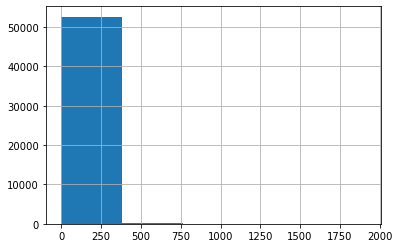

In [13]:
data['time_in_shelter'].hist(bins=5)

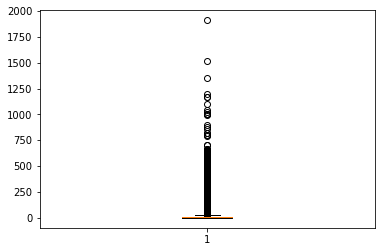

In [14]:
plt.boxplot(x=data['time_in_shelter']);

<AxesSubplot:>

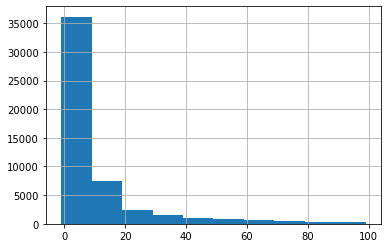

In [15]:
data[data['time_in_shelter'] < 100]['time_in_shelter'].hist()

In [16]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['intake_type', 'condition', 'breed', 'outcome', 'age_out', 'age', 'time_in_shelter']][:20]

,intake_type,condition,breed,outcome,age_out,age,time_in_shelter
1881,stray,injured,pit bull,adoption,11.0,Senior,1912
19797,surrender,normal,pit bull,adoption,5.0,Adult,1521
23574,stray,normal,labrador retriever,transfer,6.0,Adult,1351
35000,surrender,normal,pit bull,adoption,11.0,Senior,1195
32610,stray,normal,boxer,adoption,13.0,Senior,1167
32611,stray,normal,american staffordshire terrier,adoption,13.0,Senior,1167
31654,surrender,normal,pit bull,adoption,7.0,Adult,1105
38662,stray,normal,bulldog/boxer,adoption,10.0,Senior,1047
15946,stray,normal,labrador retriever,adoption,10.0,Senior,1026
13830,stray,normal,labrador retriever,adoption,12.0,Senior,1009


In [17]:
quick_look('intake_type')

stray            39006
surrender         9108
public_assist     4269
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

Missing Values: 0


In [18]:
quick_look('condition')

normal      46533
injured      2794
sick         1665
nursing      1154
aged          326
other         105
medical        89
pregnant       63
neonatal       44
behavior       20
Name: condition, dtype: int64

Missing Values: 0


In [19]:
data.groupby('intake_type').mean()['time_in_shelter']

intake_type
abandoned        15.308943
euth_request      3.274390
public_assist    14.012181
stray            15.629313
surrender        20.538318
Name: time_in_shelter, dtype: float64

In [20]:
data['intake_type'].value_counts(normalize=True)

stray            0.738848
surrender        0.172523
public_assist    0.080863
abandoned        0.004660
euth_request     0.003106
Name: intake_type, dtype: float64

In [21]:
data.groupby(by='intake_type').mean()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,,
abandoned,1.284553,1.321138,0.491870,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943
euth_request,8.286585,8.286585,0.567073,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390
public_assist,3.525884,3.554931,0.583041,0.345748,0.863200,0.633160,21.531626,35.722647,15.976351,18.759529,38.589077,50.564495,14.012181
stray,2.329513,2.362226,0.530918,0.273291,0.852253,0.636755,21.189157,35.736695,16.036061,18.948275,38.490646,51.212884,15.629313
surrender,2.717501,2.749890,0.495169,0.237923,0.801713,0.627176,21.928161,36.842166,15.689541,18.565229,37.490178,50.159548,20.538318


In [22]:
quick_look('outcome')

adoption        24191
transfer        13964
return_owner    12775
euthanasia       1537
died              267
disposal           41
missing            18
Name: outcome, dtype: int64

Missing Values: 0


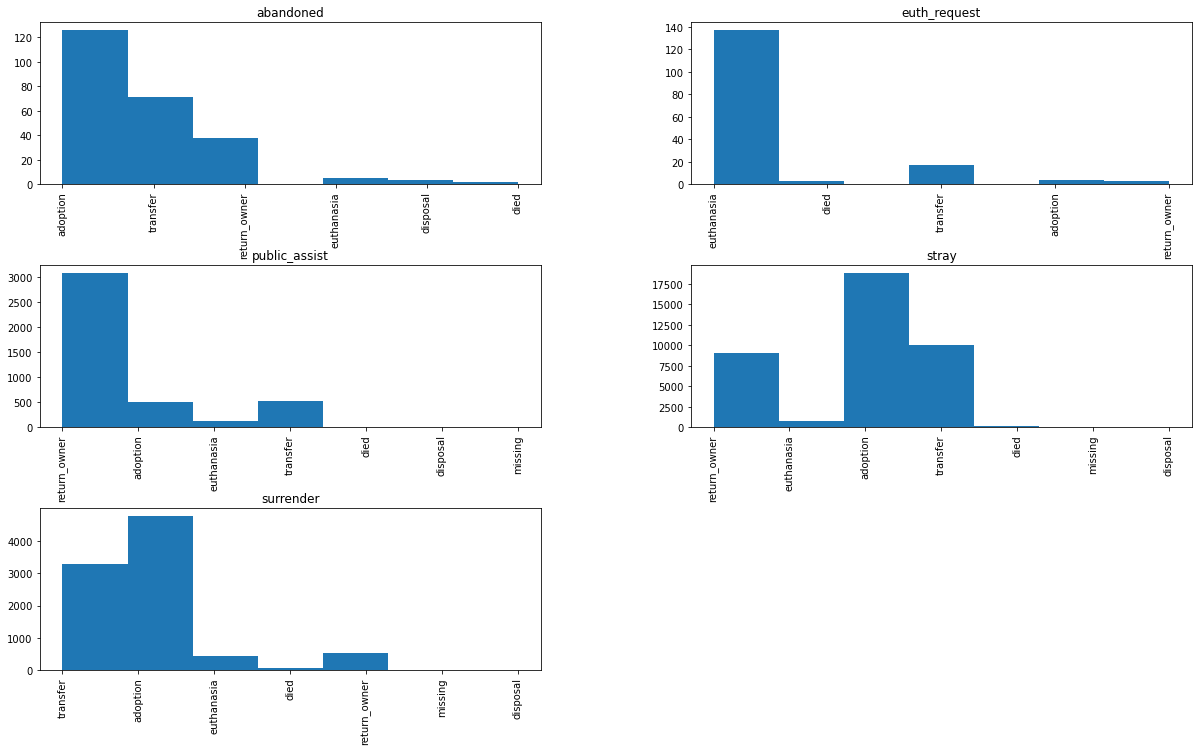

In [23]:
data['outcome'].hist(by=data['intake_type'], figsize=(20,12), bins=7);

In [24]:
quick_look('sex')

1    27922
0    24871
Name: sex, dtype: int64

Missing Values: 0


In [25]:
data.groupby('sex').mean()['time_in_shelter']

sex
0    16.433718
1    16.191462
Name: time_in_shelter, dtype: float64

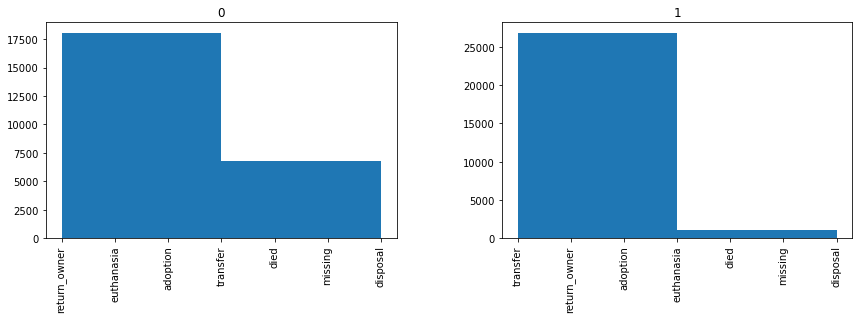

In [26]:
data['outcome'].hist(by=data['sex'], figsize=(14,4), bins=2);

In [27]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


In [28]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Baby      10.524575
Young     14.996593
Adult     19.938885
Senior    21.477122
Name: time_in_shelter, dtype: float64

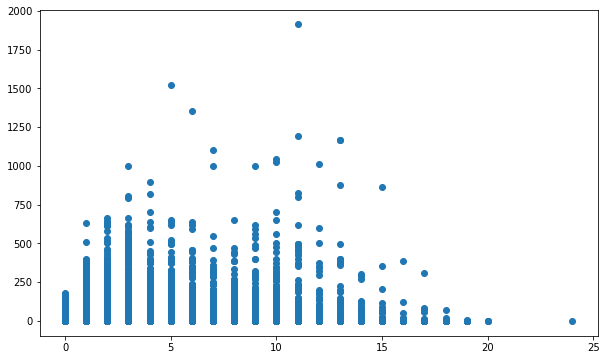

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'])

In [30]:
data.describe()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
count,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000
mean,2.506829,2.539106,0.528896,0.273786,0.844184,0.635156,21.319503,35.886783,15.980299,18.876277,38.359655,51.018680,16.305590
std,3.164678,3.181899,0.499169,0.445905,0.362684,0.260480,19.522003,29.671460,6.119823,6.499101,25.561906,32.416399,45.866732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,4.000000,10.000000,13.000000,16.000000,20.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,19.954248,40.000000,50.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,0.950000,33.500000,52.500000,21.000000,24.000000,55.000000,80.000000,11.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,1912.000000


In [31]:
data[data['time_in_shelter'] <= 1]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.614429
transfer        0.872109
euthanasia      0.934588
adoption        0.989386
died            0.998706
disposal        0.999914
missing         1.000000
Name: outcome, dtype: float64

In [32]:
data[data['time_in_shelter'] <= 2]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.589027
transfer        0.845701
adoption        0.934062
euthanasia      0.990050
died            0.998739
disposal        0.999790
missing         1.000000
Name: outcome, dtype: float64

In [33]:
data[data['time_in_shelter'] <= 3]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.520413
transfer        0.803146
adoption        0.938705
euthanasia      0.989399
died            0.998590
disposal        0.999774
missing         1.000000
Name: outcome, dtype: float64

Going to exclude dogs that have been in the system for only 1 day. They appear to be lost dogs returned to the owner or transfered out the same day.

In [187]:
data['breed_1'].value_counts()[:20]

labrador retriever                7753
chihuahua                         7715
pit bull                          7054
german shepherd                   3680
australian cattle dog             2291
dachshund                         1860
siberian husky                    1173
border collie                     1087
boxer                             1043
miniature poodle                   971
yorkshire terrier                  861
great pyrenees                     850
australian shepherd                822
fox terrier                        778
beagle                             769
miniature schnauzer                726
american staffordshire terrier     697
jack russell terrier               694
shih tzu                           667
cairn terrier                      627
Name: breed_1, dtype: int64

In [192]:
data['breed_2'].value_counts().tail(50)

tibetan spaniel                       39
toy fox terrier                       38
bullmastiff                           36
bernese mountain dog                  32
pharaoh hound                         31
finnish spitz                         29
airedale terrier                      28
australian terrier                    25
american foxhound                     24
irish terrier                         22
bearded collie                        22
english springer spaniel              22
tibetan terrier                       19
chinese crested                       18
german wirehaired pointer             18
nova scotia duck tolling retriever    16
silky terrier                         15
english foxhound                      14
beauceron                             13
newfoundland                          12
keeshond                              12
schipperke                            12
canaan dog                            11
samoyed                               11
skye terrier    

# PCA

In [34]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [150]:
y = data[(data['time_in_shelter'] > 2) & (data['time_in_shelter'] < 60)]['time_in_shelter']
X = data[(data['time_in_shelter'] > 2) & (data['time_in_shelter'] < 60)].drop(columns=['time_in_shelter'])

In [151]:
y.head()

0      4
5      6
7     49
9      9
10    10
Name: time_in_shelter, dtype: int64

In [152]:
X.columns

Index(['intake_type', 'condition', 'age_in', 'breed', 'outcome', 'age_out',
       'sex', 'intact_out', 'age', 'primary_color', 'secondary_color',
       'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower', 'reps_upper',
       'height_low_inches', 'height_high_inches', 'weight_low_lbs',
       'weight_high_lbs'],
      dtype='object')

In [153]:
numeric_cols = ['age_in', 'sex', 'intact_out', 'pure', 'obey', 'reps_lower', 'reps_upper', 'height_low_inches', 'height_high_inches', 'weight_low_lbs', 'weight_high_lbs']

In [154]:
X[numeric_cols].head()

,age_in,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,10.0,1,0,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000
5,15.0,1,0,1.0,0.95,1.0,4.0,17.941176,20.908497,42.934641,57.522876
7,16.0,1,0,1.0,0.50,26.0,40.0,7.000000,10.000000,16.000000,32.000000
9,17.0,1,0,1.0,0.30,41.0,80.0,6.000000,9.000000,2.000000,5.000000
10,13.0,0,1,0.0,0.95,1.0,4.0,21.500000,25.000000,65.000000,85.000000


In [155]:
X.shape

(35332, 21)

In [156]:
y.shape

(35332,)

In [157]:
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X[numeric_cols])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=123)

In [159]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [160]:
lr_params = {
    'alpha': [.1, .25, .5, 1, 2],
}

lr = Lasso(random_state=123, max_iter=10_000)
gs_lr = GridSearchCV(lr, lr_params)

gs_lr.fit(X_train_sc, y_train)

GridSearchCV(estimator=Lasso(max_iter=10000, random_state=123),
             param_grid={'alpha': [0.1, 0.25, 0.5, 1, 2]})

In [161]:
pd.DataFrame(gs_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.373336,0.077158,0.001436,0.000147,0.1,{'alpha': 0.1},0.031702,0.028547,3.661851e-02,3.451982e-02,0.033196,0.032917,0.002717,1
1,0.088177,0.015366,0.001346,0.000127,0.25,{'alpha': 0.25},0.021759,0.018824,2.657353e-02,2.625622e-02,0.023914,0.023465,0.002902,2
2,0.089882,0.017824,0.002063,0.001048,0.5,{'alpha': 0.5},0.018704,0.016752,2.141846e-02,2.145130e-02,0.019220,0.019509,0.001775,3
3,0.069217,0.005304,0.001900,0.000490,1,{'alpha': 1},0.006521,0.006756,6.406043e-03,6.472922e-03,0.006202,0.006472,0.000179,4
4,0.030199,0.000913,0.001312,0.000148,2,{'alpha': 2},-0.000069,-0.000044,-9.571029e-08,-3.914565e-07,-0.000006,-0.000024,0.000028,5


In [162]:
mean_squared_error(y_test, gs_lr.predict(X_test_sc), squared=False)

11.52437315363294

In [163]:
gs_lr.predict(X_test_sc)

array([12.25734412, 11.75133244, 12.75983262, ..., 10.35587218,
       13.45650532, 14.79857889])

Baseline in days

In [164]:
y.mean()

11.388429752066116

In [165]:
from sklearn.decomposition import PCA

In [166]:
X_dum = pd.concat([
    X[numeric_cols], 
    pd.get_dummies(X['breed_1']), 
    # pd.get_dummies(X['primary_color'], prefix='color'), 
    pd.get_dummies(X['condition'], prefix='condition'), 
    pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=1234)

In [168]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [169]:
pca = PCA(random_state=123, n_components=20)

In [170]:
pca.fit(X_train_sc)

PCA(n_components=20, random_state=123)

In [171]:
Z_train = pca.transform(X_train_sc)

In [172]:
Z_test = pca.transform(X_test_sc)

In [173]:
pd.DataFrame(Z_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.087719,-0.216544,-0.489727,-0.978792,0.329294,-0.791577,0.882803,-0.144591,0.128835,-0.630916,0.003385,-0.330436,0.159570,0.289019,-0.162746,0.135032,-0.016239,0.166091,-0.009059,-0.065968
1,-0.081459,0.399376,-0.626977,-1.644757,0.240435,-3.585277,0.017118,1.338495,4.911669,-1.085629,-0.614591,-6.072199,1.374398,-2.553248,-1.597440,-2.361473,-6.762029,2.700192,0.353330,-9.578551
2,2.017496,5.321127,0.704012,-1.339454,-0.564346,-0.896688,-0.646705,0.467670,-0.336109,-0.221296,-0.044199,-1.143186,0.139777,-0.931360,-0.032513,1.069813,0.239949,-0.991129,0.964984,0.324168
3,0.311299,-0.317095,-0.486814,3.108933,-2.870770,0.293933,-0.530717,-0.240439,0.302815,0.028065,-0.296970,0.019945,-0.338981,0.297361,-0.058040,0.389155,-0.139187,-0.320732,-0.052017,0.084947
4,-4.170578,-0.211143,-0.455842,-0.660805,0.215158,-0.312122,1.039055,-0.067073,0.218292,-0.631398,0.003956,-0.339214,0.204796,0.308617,-0.167904,0.111215,0.011793,0.146266,0.060094,-0.069194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26494,2.696477,-0.663379,0.139432,-0.889129,-0.206771,-0.350173,-0.967094,-0.440503,0.559514,-0.643055,-0.459470,-0.296953,0.085232,-0.106760,0.239585,-0.102601,0.390551,-0.192996,-0.069188,-0.032196
26495,-4.111121,-0.151218,-0.500112,-0.930847,0.095956,-0.418916,0.565871,-0.327165,-0.201631,-0.902503,-0.157854,-0.302141,-0.246599,-0.128271,-0.035678,0.130877,-0.041650,0.093433,-0.152803,-0.040074
26496,1.966474,5.388252,0.704922,-1.185513,-0.835729,-0.364209,-0.911553,0.310935,-0.636757,-0.493043,-0.205248,-1.117817,-0.251317,-1.342118,0.092835,1.057719,0.223882,-1.070396,0.844292,0.348986
26497,-3.784872,0.177671,-0.040139,-0.788906,0.590571,-0.362088,-0.878800,-0.165398,-0.483708,-0.653782,0.059044,-0.341528,0.085638,0.027467,-0.086914,0.400256,0.246868,0.093702,0.027780,-0.235327


In [174]:
np.round(pca.explained_variance_ratio_, 4)

array([0.0407, 0.0163, 0.0131, 0.0128, 0.0082, 0.0078, 0.0073, 0.007 ,
       0.0069, 0.0068, 0.0067, 0.0067, 0.0066, 0.0066, 0.0066, 0.0066,
       0.0065, 0.0065, 0.0065, 0.0065])

In [175]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 10 components): {np.round(var_exp[:10], 3)}')

Explained variance (first 10 components): [0.041 0.016 0.013 0.013 0.008 0.008 0.007 0.007 0.007 0.007]

Cumulative explained variance (first 10 components): [0.041 0.016 0.013 0.013 0.008 0.008 0.007 0.007 0.007 0.007]


In [176]:
## Set up dataframe with PCs and amount of explained variance
columns = [f'PCA_{i+1}' for i in pd.DataFrame(Z_train).columns]
var_ratio_df = pd.DataFrame({
    'Variation':var_exp,
    'PC':columns
})

var_ratio_df.head()

,Variation,PC
0,0.040672,PCA_1
1,0.016331,PCA_2
2,0.013116,PCA_3
3,0.012762,PCA_4
4,0.008163,PCA_5


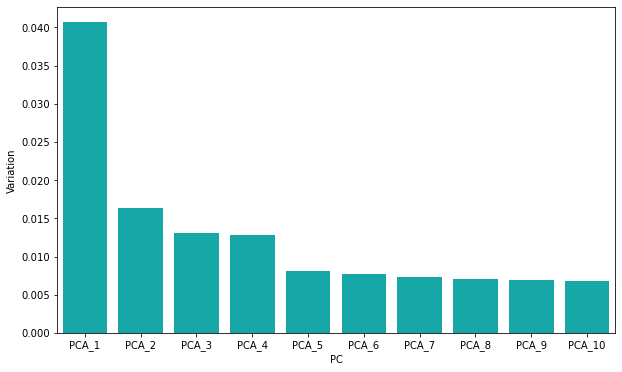

In [177]:
# Plot explained variance of each principal component
plt.figure(figsize = (10,6))
sns.barplot(x = var_ratio_df['PC'].head(10),
            y = var_ratio_df['Variation'].head(10), 
            data=var_ratio_df, color="c");

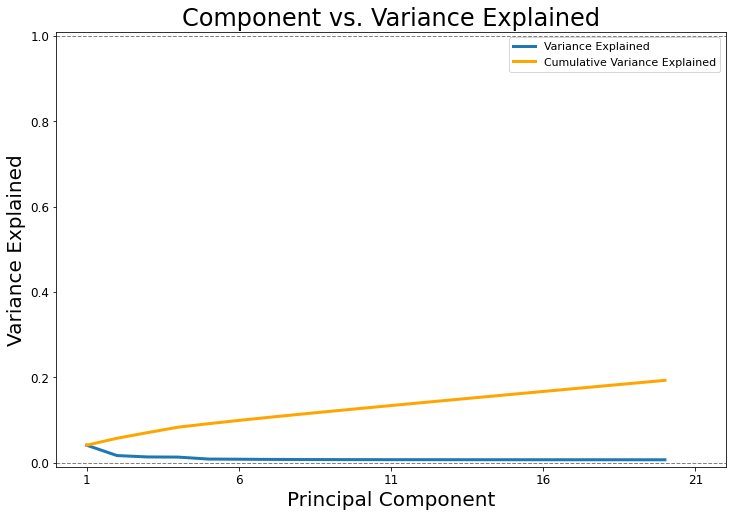

In [178]:
# Plot the variance explained (and cumulative variance explained).
plt.figure(figsize=(12,8))

# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')

# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')

# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')

# Set the limits of the axes.
plt.xlim([-1,21])
plt.ylim([-0.01,1.01])

# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)

# Make the tick labels bigger
plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
    
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

In [179]:
pca_lr = LinearRegression().fit(Z_train, y_train)

# Score on training and testing sets.
print(f'Training Score: {round(pca_lr.score(Z_train, y_train),4)}')
print(f'Testing Score: {round(pca_lr.score(Z_test, y_test),4)}')

print(f'Training RMSE: {round(pca_lr.score(Z_train, y_train),4)}')
print(f'Testing RMSE: {round(pca_lr.score(Z_test, y_test),4)}')

Training Score: 0.0435
Testing Score: 0.0493
Training RMSE: 0.0435
Testing RMSE: 0.0493


In [180]:
mean_squared_error(y_test, pca_lr.predict(Z_test), squared=False)

11.57879653840711